### Import Libraries

In [2]:
import pandas as pd
import folium
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
!pip install openpyxl

You should consider upgrading via the 'c:\users\jazi designs\anaconda3\python.exe -m pip install --upgrade pip' command.


### Import Dataset

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx", index_col = "date", parse_dates = ["date"])
df.head()

status  card_present_flag bpay_biller_code         account  \
date                                                                         
2018-08-01  authorized                1.0              NaN  ACC-1598451071   
2018-08-01  authorized                0.0              NaN  ACC-1598451071   
2018-08-01  authorized                1.0              NaN  ACC-1222300524   
2018-08-01  authorized                1.0              NaN  ACC-1037050564   
2018-08-01  authorized                1.0              NaN  ACC-1598451071   

           currency       long_lat txn_description  \
date                                                 
2018-08-01      AUD  153.41 -27.95             POS   
2018-08-01      AUD  153.41 -27.95       SALES-POS   
2018-08-01      AUD  151.23 -33.94             POS   
2018-08-01      AUD  153.10 -27.66       SALES-POS   
2018-08-01      AUD  153.41 -27.95       SALES-POS   

                                     merchant_id  merchant_code first_name  \
date                                                                         
2018-08-01  81c48296-73be-44a7-befa-d053f48ce7cd            NaN      Diana   
2018-08-01  830a451c-316e-4a6a-bf25-e37caedca49e            NaN      Diana   
2018-08-01  835c231d-8cdf-4e96-859d-e9d571760cf0            NaN    Michael   
2018-08-01  48514682-c78a-4a88-b0da-2d6302e64673            NaN     Rhonda   
2018-08-01  b4e02c10-0852-4273-b8fd-7b3395e32eb0            NaN      Diana   

            balance gender  age merchant_suburb merchant_state  \
date                                                             
2018-08-01    35.39      F   26         Ashmore            QLD   
2018-08-01    21.20      F   26          Sydney            NSW   
2018-08-01     5.71      M   38          Sydney            NSW   
2018-08-01  2117.22      F   40         Buderim            QLD   
2018-08-01    17.95      F   26   Mermaid Beach            QLD   

                              extraction  amount  \
date                                               
2018-08-01  2018-08-01T01:01:15.000+0000   16.25   
2018-08-01  2018-08-01T01:13:45.000+0000   14.19   
2018-08-01  2018-08-01T01:26:15.000+0000    6.42   
2018-08-01  2018-08-01T01:38:45.000+0000   40.90   
2018-08-01  2018-08-01T01:51:15.000+0000    3.25   

                              transaction_id    country     customer_id  \
date                                                                      
2018-08-01  a623070bfead4541a6b0fff8a09e706c  Australia  CUS-2487424745   
2018-08-01  13270a2a902145da9db4c951e04b51b9  Australia  CUS-2487424745   
2018-08-01  feb79e7ecd7048a5a36ec889d1a94270  Australia  CUS-2142601169   
2018-08-01  2698170da3704fd981b15e64a006079e  Australia  CUS-1614226872   
2018-08-01  329adf79878c4cf0aeb4188b4691c266  Australia  CUS-2487424745   

           merchant_long_lat movement  
date                                   
2018-08-01     153.38 -27.99    debit  
2018-08-01     151.21 -33.87    debit  
2018-08-01     151.21 -33.87    debit  
2018-08-01     153.05 -26.68    debit  
2018-08-01     153.44 -28.06    debit

### Data Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12043 entries, 2018-08-01 to 2018-10-31
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  gender             12043 non-null  object 
 12  age                12043 non-null  int64  
 13  merchant_suburb    7717 non-null   object 
 14  merchant_state     7717 non-null   object 
 15  extraction         12043 non-null  object 
 16  amoun

In [7]:
df.describe()

card_present_flag  merchant_code        balance           age  \
count        7717.000000          883.0   12043.000000  12043.000000   
mean            0.802644            0.0   14704.195553     30.582330   
std             0.398029            0.0   31503.722652     10.046343   
min             0.000000            0.0       0.240000     18.000000   
25%             1.000000            0.0    3158.585000     22.000000   
50%             1.000000            0.0    6432.010000     28.000000   
75%             1.000000            0.0   12465.945000     38.000000   
max             1.000000            0.0  267128.520000     78.000000   

             amount  
count  12043.000000  
mean     187.933588  
std      592.599934  
min        0.100000  
25%       16.000000  
50%       29.000000  
75%       53.655000  
max     8835.980000

**Remove unnecessary columns**

In [8]:
df.drop(columns = ["card_present_flag",
                   "bpay_biller_code",
                   "merchant_code",
                   "merchant_id",
                   "merchant_suburb",
                   "merchant_state",
                   "merchant_long_lat"], inplace = True)

### Data Analysis and Visualizations

**Average Tansaction Amount**

In [9]:
print("Average Transaction Amount =", np.round(df["amount"].mean(), 2))

Average Transaction Amount = 187.93


**Number of Transctions by Customers Each Month**

In [10]:
df["Month"] = df.index.month_name()
atm = df.groupby("Month")["Month"].agg(["count"])
atm.columns = ["Total Transactions"]
atm

Total Transactions
Month                        
August                   3943
October                  4087
September                4013

In [11]:
print("Average Number of Transactions by Customers Each Month =", np.round(atm["Total Transactions"].mean(), 2))

Average Number of Transactions by Customers Each Month = 4014.33


**Number of Transactions by Date**

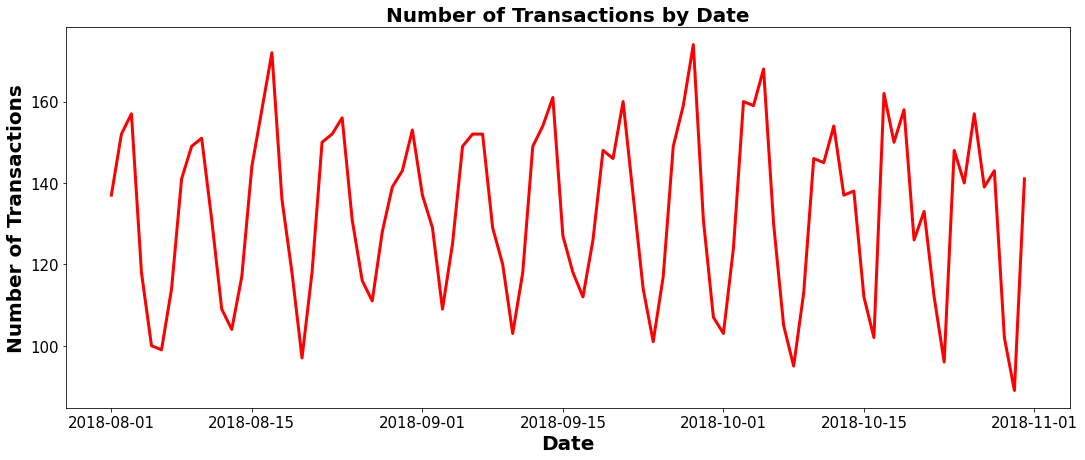

In [12]:
df["Date"] = df.index
td = df.groupby("Date")["Date"].agg(["count"])

plt.figure(figsize = (18, 7))
sns.lineplot(x = td.index, y = "count", data = td, color = "red", linewidth = 3)
plt.title("Number of Transactions by Date", weight = "bold", size = 20)
plt.xlabel("Date", weight = "bold", size = 20)
plt.ylabel("Number of Transactions", weight = "bold", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Average Transactions Amount by Date**

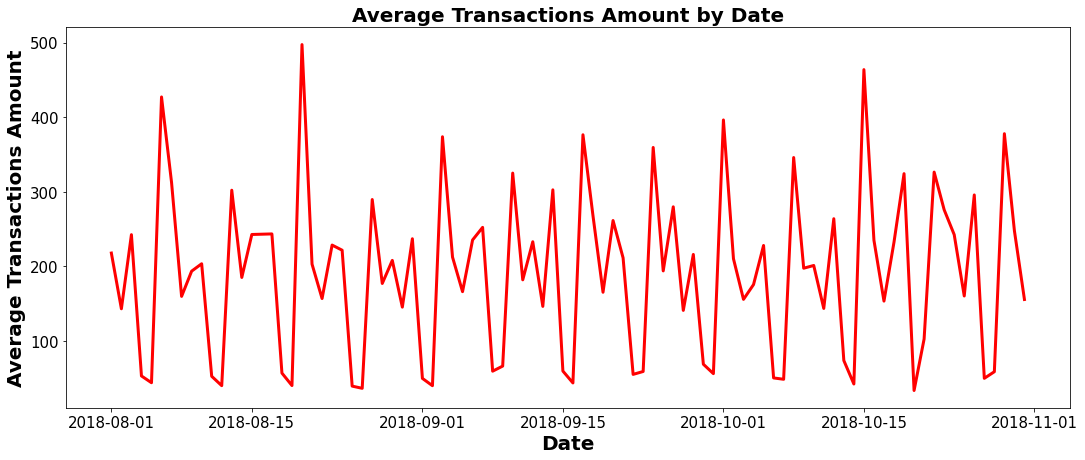

In [13]:
tmd = df.groupby("Date")["amount"].agg(["mean"])

plt.figure(figsize = (18, 7))
sns.lineplot(x = tmd.index, y = "mean", data = tmd, color = "red", linewidth = 3)
plt.title("Average Transactions Amount by Date", weight = "bold", size = 20)
plt.xlabel("Date", weight = "bold", size = 20)
plt.ylabel("Average Transactions Amount", weight = "bold", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Averae Number of transactions by Day Name**

In [22]:
df.head(2)

status         account currency       long_lat  \
date                                                             
2018-08-01  authorized  ACC-1598451071      AUD  153.41 -27.95   
2018-08-01  authorized  ACC-1598451071      AUD  153.41 -27.95   

           txn_description first_name  balance gender  age  \
date                                                         
2018-08-01             POS      Diana    35.39      F   26   
2018-08-01       SALES-POS      Diana    21.20      F   26   

                              extraction  amount  \
date                                               
2018-08-01  2018-08-01T01:01:15.000+0000   16.25   
2018-08-01  2018-08-01T01:13:45.000+0000   14.19   

                              transaction_id    country     customer_id  \
date                                                                      
2018-08-01  a623070bfead4541a6b0fff8a09e706c  Australia  CUS-2487424745   
2018-08-01  13270a2a902145da9db4c951e04b51b9  Australia  CUS-2487424745   

           movement   Month       Date   Day Name  
date                                               
2018-08-01    debit  August 2018-08-01  Wednesday  
2018-08-01    debit  August 2018-08-01  Wednesday

In [27]:
df

status         account currency       long_lat  \
date                                                             
2018-08-01  authorized  ACC-1598451071      AUD  153.41 -27.95   
2018-08-01  authorized  ACC-1598451071      AUD  153.41 -27.95   
2018-08-01  authorized  ACC-1222300524      AUD  151.23 -33.94   
2018-08-01  authorized  ACC-1037050564      AUD  153.10 -27.66   
2018-08-01  authorized  ACC-1598451071      AUD  153.41 -27.95   
...                ...             ...      ...            ...   
2018-10-31  authorized  ACC-3021093232      AUD  149.83 -29.47   
2018-10-31  authorized  ACC-1608363396      AUD  151.22 -33.87   
2018-10-31  authorized  ACC-3827517394      AUD  151.12 -33.89   
2018-10-31  authorized  ACC-2920611728      AUD  144.96 -37.76   
2018-10-31  authorized  ACC-1443681913      AUD  150.92 -33.77   

           txn_description first_name   balance gender  age  \
date                                                          
2018-08-01             POS      Diana     35.39      F   26   
2018-08-01       SALES-POS      Diana     21.20      F   26   
2018-08-01             POS    Michael      5.71      M   38   
2018-08-01       SALES-POS     Rhonda   2117.22      F   40   
2018-08-01       SALES-POS      Diana     17.95      F   26   
...                    ...        ...       ...    ...  ...   
2018-10-31             POS    Melissa  14054.14      F   30   
2018-10-31       SALES-POS     Robert   9137.79      M   20   
2018-10-31             POS      Craig  45394.57      M   28   
2018-10-31       SALES-POS      Tyler  11350.67      M   69   
2018-10-31       SALES-POS       Ryan   5517.91      M   31   

                              extraction  amount  \
date                                               
2018-08-01  2018-08-01T01:01:15.000+0000   16.25   
2018-08-01  2018-08-01T01:13:45.000+0000   14.19   
2018-08-01  2018-08-01T01:26:15.000+0000    6.42   
2018-08-01  2018-08-01T01:38:45.000+0000   40.90   
2018-08-01  2018-08-01T01:51:15.000+0000    3.25   
...                                  ...     ...   
2018-10-31  2018-10-31T23:09:06.000+0000    9.79   
2018-10-31  2018-10-31T23:21:46.000+0000   63.87   
2018-10-31  2018-10-31T23:34:25.000+0000   43.96   
2018-10-31  2018-10-31T23:47:05.000+0000   30.77   
2018-10-31  2018-10-31T23:59:44.000+0000   22.36   

                              transaction_id    country     customer_id  \
date                                                                      
2018-08-01  a623070bfead4541a6b0fff8a09e706c  Australia  CUS-2487424745   
2018-08-01  13270a2a902145da9db4c951e04b51b9  Australia  CUS-2487424745   
2018-08-01  feb79e7ecd7048a5a36ec889d1a94270  Australia  CUS-2142601169   
2018-08-01  2698170da3704fd981b15e64a006079e  Australia  CUS-1614226872   
2018-08-01  329adf79878c4cf0aeb4188b4691c266  Australia  CUS-2487424745   
...                                      ...        ...             ...   
2018-10-31  f2e3e695c2ee4c50a4c8747f852cbe2e  Australia    CUS-55310383   
2018-10-31  56e147e5485f4683b9076fcaaed76640  Australia  CUS-2688605418   
2018-10-31  2fdd4681827343f6af2e6519644a684a  Australia  CUS-2663907001   
2018-10-31  74aa9cd7e4af4c6d9cd7dbd28e9aedc9  Australia  CUS-1388323263   
2018-10-31  6d5218e04e8040b9996850ce11a19426  Australia  CUS-3129499595   

           movement    Month       Date   Day Name  
date                                                
2018-08-01    debit   August 2018-08-01  Wednesday  
2018-08-01    debit   August 2018-08-01  Wednesday  
2018-08-01    debit   August 2018-08-01  Wednesday  
2018-08-01    debit   August 2018-08-01  Wednesday  
2018-08-01    debit   August 2018-08-01  Wednesday  
...             ...      ...        ...        ...  
2018-10-31    debit  October 2018-10-31  Wednesday  
2018-10-31    debit  October 2018-10-31  Wednesday  
2018-10-31    debit  October 2018-10-31  Wednesday  
2018-10-31    debit  October 2018-10-31  Wednesday  
2018-10-31    debit  October 2018-10-31  Wednesd

In [30]:
data = df.groupby(["Date", "Day Name"])["Day Name"].agg(["count"]).reset_index()
data

Date   Day Name  count
0  2018-08-01  Wednesday    137
1  2018-08-02   Thursday    152
2  2018-08-03     Friday    157
3  2018-08-04   Saturday    118
4  2018-08-05     Sunday    100
..        ...        ...    ...
86 2018-10-27   Saturday    139
87 2018-10-28     Sunday    143
88 2018-10-29     Monday    102
89 2018-10-30    Tuesday     89
90 2018-10-31  Wednesday    141

[91 rows x 3 columns]

In [34]:
data.groupby("Day Name")["count"].mean()

Day Name
Friday       159.461538
Monday       104.615385
Saturday     131.461538
Sunday       119.230769
Thursday     150.083333
Tuesday      114.384615
Wednesday    147.357143
Name: count, dtype: float64

**Number of Transactions by Day Name**

In [14]:
df["Day Name"] = df.index.day_name()
atd = df.groupby("Day Name")["Day Name"].agg(["count"])
atd

count
Day Name        
Friday      2073
Monday      1360
Saturday    1709
Sunday      1550
Thursday    1801
Tuesday     1487
Wednesday   2063

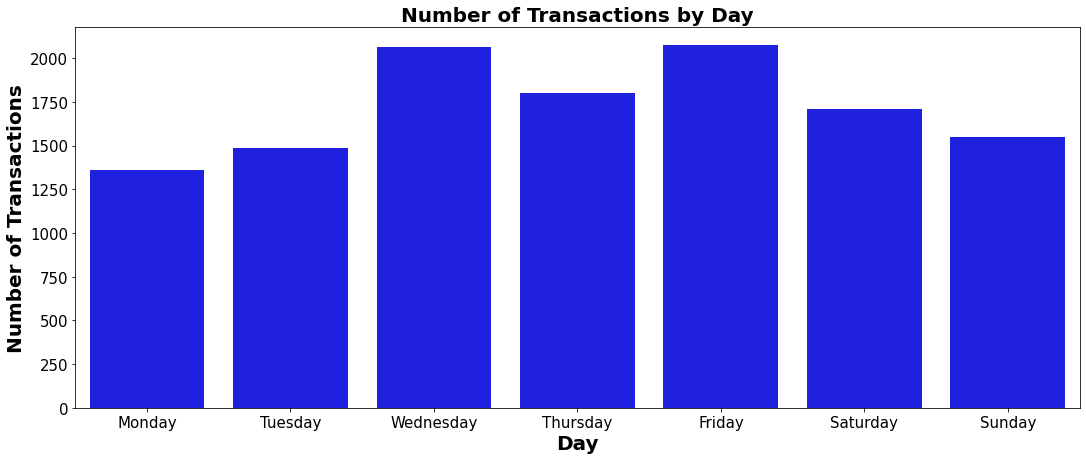

In [15]:
plt.figure(figsize = (18, 7))
atd = atd.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
sns.barplot(x = atd.index, y = "count", data = atd, color = "blue")
plt.title("Number of Transactions by Day", weight = "bold", size = 20)
plt.xlabel("Day", weight = "bold", size = 20)
plt.ylabel("Number of Transactions", weight = "bold", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Average Transactions amount by Day Name**

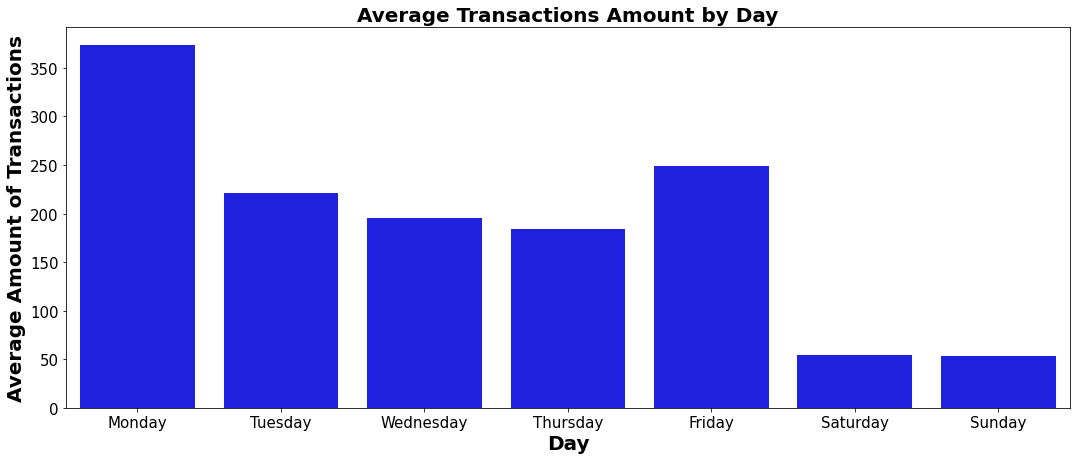

In [16]:
atdn = df.groupby("Day Name")["amount"].agg(["mean"])
atdn = atdn.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.figure(figsize = (18, 7))
sns.barplot(x = atdn.index, y = "mean", data = atdn, color = "blue")
plt.title("Average Transactions Amount by Day", weight = "bold", size = 20)
plt.xlabel("Day", weight = "bold", size = 20)
plt.ylabel("Average Amount of Transactions", weight = "bold", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Number of Transacrions by Month and Day**

In [17]:
atmd = df.groupby(["Month", "Day Name"])["Day Name"].agg(["count"]).reset_index()
atmd_pivot = pd.pivot_table(index = "Month", columns = ["Day Name"], values = "count", data = atmd)
atmd_pivot = atmd_pivot[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]] 
atmd_pivot = atmd_pivot.reindex(["August", "September", "October"])
atmd_pivot

Day Name   Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Month                                                                    
August        411      477        711       596     789       516     443
September     425      486        595       611     647       661     588
October       524      524        757       594     637       532     519

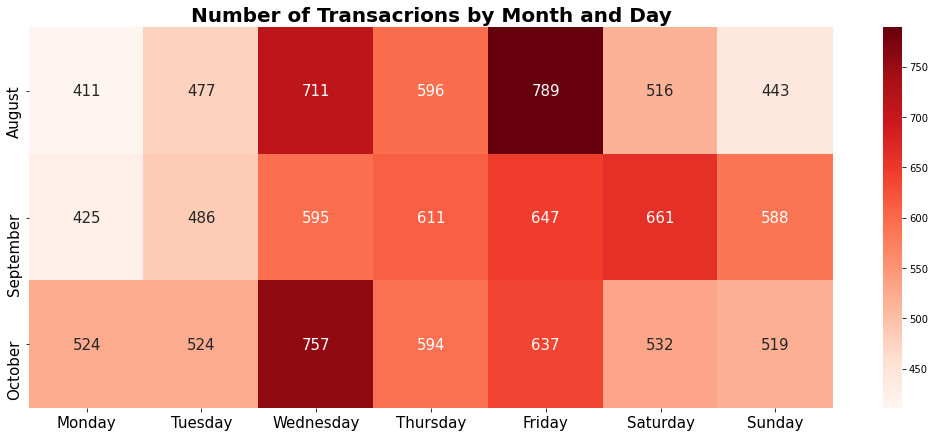

In [18]:
plt.figure(figsize = (18, 7))
plt.title("Number of Transacrions by Month and Day", size = 20, weight = "bold")
sns.heatmap(atmd_pivot, annot = True, cmap = "Reds", fmt = "g", annot_kws={'size': 15})
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.savefig("Transactions_MD.png")
plt.show()

**Average Amount of Transacrions by Month and Day**

In [20]:
avtmd = df.groupby(["Month", "Day Name"])["amount"].agg(["mean"]).reset_index().round()
avtmd_pivot = pd.pivot_table(index = "Month", columns = ["Day Name"], values = "mean", data = avtmd)
avtmd_pivot = avtmd_pivot[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]] 
avtmd_pivot = avtmd_pivot.reindex(["August", "September", "October"])
avtmd_pivot

Day Name   Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Month                                                                    
August      375.0    218.0      197.0     178.0   230.0      51.0    40.0
September   359.0    215.0      211.0     195.0   245.0      59.0    53.0
October     383.0    231.0      181.0     179.0   277.0      53.0    64.0

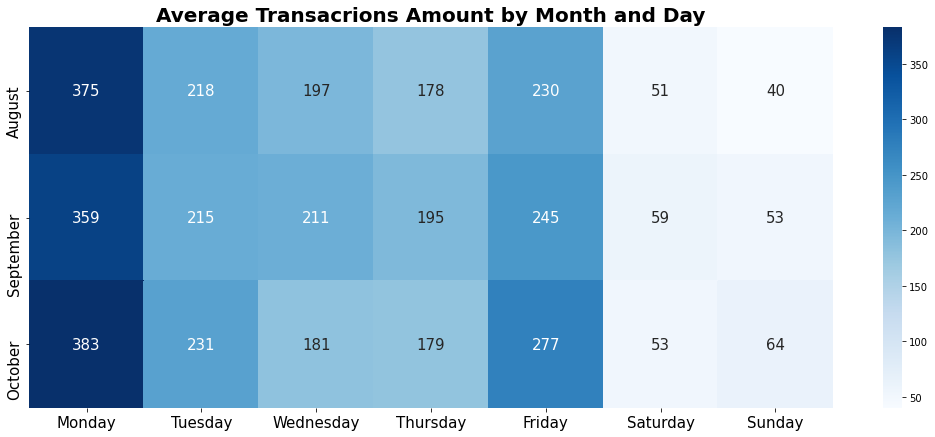

In [21]:
plt.figure(figsize = (18, 7))
plt.title("Average Transacrions Amount by Month and Day", size = 20, weight = "bold")
sns.heatmap(avtmd_pivot, annot = True, cmap = "Blues", fmt = "g", annot_kws={'size': 15})
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.savefig("AT_MD.png")
plt.show()

In [20]:
df.head()

status         account currency       long_lat  \
date                                                             
2018-08-01  authorized  ACC-1598451071      AUD  153.41 -27.95   
2018-08-01  authorized  ACC-1598451071      AUD  153.41 -27.95   
2018-08-01  authorized  ACC-1222300524      AUD  151.23 -33.94   
2018-08-01  authorized  ACC-1037050564      AUD  153.10 -27.66   
2018-08-01  authorized  ACC-1598451071      AUD  153.41 -27.95   

           txn_description first_name  balance gender  age  \
date                                                         
2018-08-01             POS      Diana    35.39      F   26   
2018-08-01       SALES-POS      Diana    21.20      F   26   
2018-08-01             POS    Michael     5.71      M   38   
2018-08-01       SALES-POS     Rhonda  2117.22      F   40   
2018-08-01       SALES-POS      Diana    17.95      F   26   

                              extraction  amount  \
date                                               
2018-08-01  2018-08-01T01:01:15.000+0000   16.25   
2018-08-01  2018-08-01T01:13:45.000+0000   14.19   
2018-08-01  2018-08-01T01:26:15.000+0000    6.42   
2018-08-01  2018-08-01T01:38:45.000+0000   40.90   
2018-08-01  2018-08-01T01:51:15.000+0000    3.25   

                              transaction_id    country     customer_id  \
date                                                                      
2018-08-01  a623070bfead4541a6b0fff8a09e706c  Australia  CUS-2487424745   
2018-08-01  13270a2a902145da9db4c951e04b51b9  Australia  CUS-2487424745   
2018-08-01  feb79e7ecd7048a5a36ec889d1a94270  Australia  CUS-2142601169   
2018-08-01  2698170da3704fd981b15e64a006079e  Australia  CUS-1614226872   
2018-08-01  329adf79878c4cf0aeb4188b4691c266  Australia  CUS-2487424745   

           movement   Month       Date   Day Name  
date                                               
2018-08-01    debit  August 2018-08-01  Wednesday  
2018-08-01    debit  August 2018-08-01  Wednesday  
2018-08-01    debit  August 2018-08-01  Wednesday  
2018-08-01    debit  August 2018-08-01  Wednesday  
2018-08-01    debit  August 2018-08-01  Wednesday

In [21]:
df["longitude"] = df["long_lat"].str.split(" ").str.get(0)
df["latitude"] = df["long_lat"].str.split(" ").str.get(1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12043 entries, 2018-08-01 to 2018-10-31
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   status           12043 non-null  object        
 1   account          12043 non-null  object        
 2   currency         12043 non-null  object        
 3   long_lat         12043 non-null  object        
 4   txn_description  12043 non-null  object        
 5   first_name       12043 non-null  object        
 6   balance          12043 non-null  float64       
 7   gender           12043 non-null  object        
 8   age              12043 non-null  int64         
 9   extraction       12043 non-null  object        
 10  amount           12043 non-null  float64       
 11  transaction_id   12043 non-null  object        
 12  country          12043 non-null  object        
 13  customer_id      12043 non-null  object        
 14  movement         1204

In [24]:
df

status         account currency       long_lat  \
date                                                             
2018-08-01  authorized  ACC-1598451071      AUD  153.41 -27.95   
2018-08-01  authorized  ACC-1598451071      AUD  153.41 -27.95   
2018-08-01  authorized  ACC-1222300524      AUD  151.23 -33.94   
2018-08-01  authorized  ACC-1037050564      AUD  153.10 -27.66   
2018-08-01  authorized  ACC-1598451071      AUD  153.41 -27.95   
...                ...             ...      ...            ...   
2018-10-31  authorized  ACC-3021093232      AUD  149.83 -29.47   
2018-10-31  authorized  ACC-1608363396      AUD  151.22 -33.87   
2018-10-31  authorized  ACC-3827517394      AUD  151.12 -33.89   
2018-10-31  authorized  ACC-2920611728      AUD  144.96 -37.76   
2018-10-31  authorized  ACC-1443681913      AUD  150.92 -33.77   

           txn_description first_name   balance gender  age  \
date                                                          
2018-08-01             POS      Diana     35.39      F   26   
2018-08-01       SALES-POS      Diana     21.20      F   26   
2018-08-01             POS    Michael      5.71      M   38   
2018-08-01       SALES-POS     Rhonda   2117.22      F   40   
2018-08-01       SALES-POS      Diana     17.95      F   26   
...                    ...        ...       ...    ...  ...   
2018-10-31             POS    Melissa  14054.14      F   30   
2018-10-31       SALES-POS     Robert   9137.79      M   20   
2018-10-31             POS      Craig  45394.57      M   28   
2018-10-31       SALES-POS      Tyler  11350.67      M   69   
2018-10-31       SALES-POS       Ryan   5517.91      M   31   

                              extraction  amount  \
date                                               
2018-08-01  2018-08-01T01:01:15.000+0000   16.25   
2018-08-01  2018-08-01T01:13:45.000+0000   14.19   
2018-08-01  2018-08-01T01:26:15.000+0000    6.42   
2018-08-01  2018-08-01T01:38:45.000+0000   40.90   
2018-08-01  2018-08-01T01:51:15.000+0000    3.25   
...                                  ...     ...   
2018-10-31  2018-10-31T23:09:06.000+0000    9.79   
2018-10-31  2018-10-31T23:21:46.000+0000   63.87   
2018-10-31  2018-10-31T23:34:25.000+0000   43.96   
2018-10-31  2018-10-31T23:47:05.000+0000   30.77   
2018-10-31  2018-10-31T23:59:44.000+0000   22.36   

                              transaction_id    country     customer_id  \
date                                                                      
2018-08-01  a623070bfead4541a6b0fff8a09e706c  Australia  CUS-2487424745   
2018-08-01  13270a2a902145da9db4c951e04b51b9  Australia  CUS-2487424745   
2018-08-01  feb79e7ecd7048a5a36ec889d1a94270  Australia  CUS-2142601169   
2018-08-01  2698170da3704fd981b15e64a006079e  Australia  CUS-1614226872   
2018-08-01  329adf79878c4cf0aeb4188b4691c266  Australia  CUS-2487424745   
...                                      ...        ...             ...   
2018-10-31  f2e3e695c2ee4c50a4c8747f852cbe2e  Australia    CUS-55310383   
2018-10-31  56e147e5485f4683b9076fcaaed76640  Australia  CUS-2688605418   
2018-10-31  2fdd4681827343f6af2e6519644a684a  Australia  CUS-2663907001   
2018-10-31  74aa9cd7e4af4c6d9cd7dbd28e9aedc9  Australia  CUS-1388323263   
2018-10-31  6d5218e04e8040b9996850ce11a19426  Australia  CUS-3129499595   

           movement    Month       Date   Day Name longitude latitude  
date                                                                   
2018-08-01    debit   August 2018-08-01  Wednesday    153.41   -27.95  
2018-08-01    debit   August 2018-08-01  Wednesday    153.41   -27.95  
2018-08-01    debit   August 2018-08-01  Wednesday    151.23   -33.94  
2018-08-01    debit   August 2018-08-01  Wednesday    153.10   -27.66  
2018-08-01    debit   August 2018-08-01  Wednesday    153.41   -27.95  
...             ...      ...        ...        ...       ...      ...  
2018-10-31    debit  October 2018-10-31  Wednesday    149.83   -29.47  
2018-10-31    debit  October 2018-10

In [27]:
df["longitude"] = df["longitude"].astype("float")

In [28]:
df["latitude"] = df["latitude"].astype("float")

In [30]:
!pip install folium

You should consider upgrading via the 'c:\users\jazi designs\anaconda3\python.exe -m pip install --upgrade pip' command.


In [39]:
from folium import plugins

australia_map = folium.Map(location = [-25, 133], zoom_start = 4)

area = plugins.MarkerCluster().add_to(australia_map)

for lat, lng, label, in zip(df["latitude"], df["longitude"], df["amount"]):
    folium.Marker(
        location=[lat, lng],
        icon=None,
    ).add_to(area)

# displ
australia_map